## Characterizing self-reported navigation ability using demographic information

### read data

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [ ]:
# df = pd.read_csv('/content/drive/My Drive/SHQ/Data/cfa_test_df.csv')

df = pd.read_csv('/content/drive/My Drive/SHQ/Data/cfa_test_df2.csv')

In [ ]:
df

,age,gender,hand,navigating_skills,sleep,edu_level,commute_level,home_env
0,68.0,0,0,1,8.0,0,0,2
1,18.0,1,1,2,7.0,1,0,1
2,18.0,1,1,3,7.0,1,2,2
3,21.0,0,0,2,7.0,0,1,1
4,36.0,1,0,3,5.0,0,1,0
...,...,...,...,...,...,...,...,...
909451,50.0,1,1,2,6.0,1,2,0
909452,68.0,1,0,2,8.0,0,1,2
909453,59.0,0,0,3,7.0,1,0,2
909454,48.0,1,0,2,6.0,0,2,1


In [ ]:
df.head()

,age,gender,hand,navigating_skills,sleep,edu_level,commute_level,home_env
0,68.0,0,0,1,8.0,0,0,2
1,18.0,1,1,2,7.0,1,0,1
2,18.0,1,1,3,7.0,1,2,2
3,21.0,0,0,2,7.0,0,1,1
4,36.0,1,0,3,5.0,0,1,0


## Clustering


In [ ]:

!pip install mglearn

     |████████████████████████████████| 540 kB 5.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=dc708b2b2ff3bd9ef526fc054dd81d4c1d7bd4f75fe21c75ba741c25531b12b7
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import scale,RobustScaler,StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
#import mglearn
import matplotlib.pyplot as plt

In [ ]:
# MinMax scaled
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df)
df2 = scaler.transform(df)
df2 = pd.DataFrame(df2,index=df.index,columns=['age',	'gender',	'hand',	'navigating_skills',	'sleep',	'edu_level',	'commute_level',	'home_env'])
df2[:10]

,age,gender,hand,navigating_skills,sleep,edu_level,commute_level,home_env
0,0.961538,0.0,0.0,0.333333,0.636364,0.0,0.0,1.0
1,0.000000,1.0,1.0,0.666667,0.545455,1.0,0.0,0.5
2,0.000000,1.0,1.0,1.000000,0.545455,1.0,1.0,1.0
3,0.057692,0.0,0.0,0.666667,0.545455,0.0,0.5,0.5
4,0.346154,1.0,0.0,1.000000,0.363636,0.0,0.5,0.0
5,0.019231,1.0,0.0,0.666667,0.636364,1.0,0.0,0.5
6,0.826923,1.0,0.0,0.666667,0.545455,0.0,0.0,0.5
7,0.211538,1.0,0.0,1.000000,0.545455,0.0,1.0,0.0
8,0.019231,0.0,0.0,0.333333,0.636364,0.0,0.0,0.5
9,0.384615,1.0,0.0,0.666667,0.545455,0.0,0.0,0.0


In [ ]:
test = scaler.transform(df)

In [ ]:
df2.head()

,age,gender,hand,navigating_skills,sleep,edu_level,commute_level,home_env
0,0.961538,0.0,0.0,0.333333,0.636364,0.0,0.0,1.0
1,0.000000,1.0,1.0,0.666667,0.545455,1.0,0.0,0.5
2,0.000000,1.0,1.0,1.000000,0.545455,1.0,1.0,1.0
3,0.057692,0.0,0.0,0.666667,0.545455,0.0,0.5,0.5
4,0.346154,1.0,0.0,1.000000,0.363636,0.0,0.5,0.0


In [ ]:
df3 = df2.drop(columns="navigating_skills", axis=1)

In [ ]:
df3.head()

,age,gender,hand,sleep,edu_level,commute_level,home_env
0,0.961538,0.0,0.0,0.636364,0.0,0.0,1.0
1,0.000000,1.0,1.0,0.545455,1.0,0.0,0.5
2,0.000000,1.0,1.0,0.545455,1.0,1.0,1.0
3,0.057692,0.0,0.0,0.545455,0.0,0.5,0.5
4,0.346154,1.0,0.0,0.363636,0.0,0.5,0.0


In [ ]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

## Step1. Initial K-Means Clustering

No handles with labels found to put in legend.


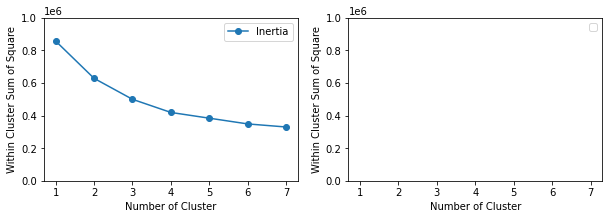

In [ ]:
results = dict()
k_cand = [1, 2,3,4,5,6,7] #

for k in k_cand:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df3)
    score0 = kmeans.inertia_
    #score1 = silhouette_score(df2,kmeans.labels_,metric='euclidean')
    #score2 = silhouette_score(df2,kmeans.labels_,metric='correlation')
    results[k] = {'k':kmeans,'s0':score0} #,'s1':score1,'s2':score2

fig,axs = plt.subplots(1,2,sharex=True,figsize=(10,3))
axs[0].plot([i for i in results.keys()],[i['s0'] for i in results.values()],'o-',label='Inertia')
#axs[1].plot([i for i in results.keys()],[i['s1'] for i in results.values()],'o-',label='Euclidean')
#axs[1].plot([i for i in results.keys()],[i['s2'] for i in results.values()],'o-',label='Correlation')
for ax in axs:
    ax.set_xticks(k_cand)
    ax.set_xlabel('Number of Cluster')
    ax.set_ylabel('Within Cluster Sum of Square')
    ax.set_ylim(0, 1000000)
    ax.legend()

## Step2.1 Calinski Harabasz Score

In [ ]:
# Higher value of CH index means the clusters are dense and well separated, although there is no “acceptable” cut-off value. 
# We need to choose that solution which gives a peak or at least an abrupt elbow on the line plot of CH indices. On the other hand, 
# if the line is smooth (horizontal or ascending or descending) then there is no such reason to prefer one solution over others. 

# The Davies–Bouldin index (DBI) (introduced by David L. Davies and Donald W. Bouldin in 1979), a metric for evaluating clustering algorithms, 
# is an internal evaluation scheme, where the validation of how well the clustering has been done is made using quantities and features inherent to the dataset.
# Lower the DB index value, better is the clustering. It also has a drawback. A good value reported by this method does not imply the best information retrieval.

In [ ]:
from sklearn import metrics

No handles with labels found to put in legend.


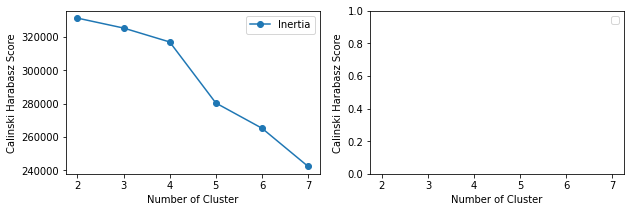

In [ ]:
results = dict()
k_cand = [ 2,3,4,5,6,7] #

for k in k_cand:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df3)
    labels = kmeans.labels_
    score0 = metrics.calinski_harabasz_score(df3, labels)
    #score1 = silhouette_score(df2,kmeans.labels_,metric='euclidean')
    #score2 = silhouette_score(df2,kmeans.labels_,metric='correlation')
    results[k] = {'k':kmeans,'s0':score0} #,'s1':score1,'s2':score2

fig,axs = plt.subplots(1,2,sharex=True,figsize=(10,3))
axs[0].plot([i for i in results.keys()],[i['s0'] for i in results.values()],'o-',label='Inertia')
#axs[1].plot([i for i in results.keys()],[i['s1'] for i in results.values()],'o-',label='Euclidean')
#axs[1].plot([i for i in results.keys()],[i['s2'] for i in results.values()],'o-',label='Correlation')
for ax in axs:
    ax.set_xticks(k_cand)
    ax.set_xlabel('Number of Cluster')
    ax.set_ylabel('Calinski Harabasz Score')
    ax.legend()    

## Step 2.2 Davies Bouldin Score

No handles with labels found to put in legend.


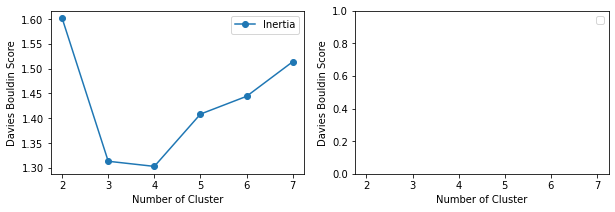

In [ ]:
results = dict()
k_cand = [ 2,3,4,5,6,7] #

for k in k_cand:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df3)
    labels = kmeans.labels_
    score0 = metrics.davies_bouldin_score(df3, labels)
    #score1 = silhouette_score(df2,kmeans.labels_,metric='euclidean')
    #score2 = silhouette_score(df2,kmeans.labels_,metric='correlation')
    results[k] = {'k':kmeans,'s0':score0} #,'s1':score1,'s2':score2

fig,axs = plt.subplots(1,2,sharex=True,figsize=(10,3))
axs[0].plot([i for i in results.keys()],[i['s0'] for i in results.values()],'o-',label='Inertia')
#axs[1].plot([i for i in results.keys()],[i['s1'] for i in results.values()],'o-',label='Euclidean')
#axs[1].plot([i for i in results.keys()],[i['s2'] for i in results.values()],'o-',label='Correlation')
for ax in axs:
    ax.set_xticks(k_cand)
    ax.set_xlabel('Number of Cluster')
    ax.set_ylabel('Davies Bouldin Score')
    ax.legend()

## Step2.3 Average Silhouette Score

No handles with labels found to put in legend.


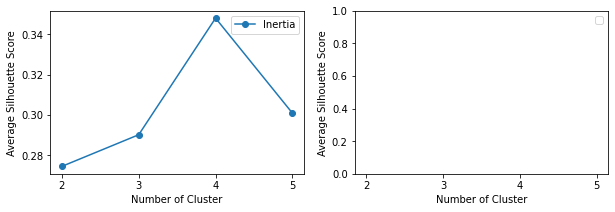

In [ ]:
results = dict()
k_cand = [ 2,3,4,5] 
sil = [0.2744796755850493, 0.290177973522508, 0.3480058327912568, 0.3008798408294185]

for k in k_cand:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df3)
    labels = kmeans.labels_
    score0 = sil[k-2]  #metrics.davies_bouldin_score(df3, labels)
    #score1 = silhouette_score(df2,kmeans.labels_,metric='euclidean')
    #score2 = silhouette_score(df2,kmeans.labels_,metric='correlation')
    results[k] = {'k':kmeans,'s0':score0} #,'s1':score1,'s2':score2

fig,axs = plt.subplots(1,2,sharex=True,figsize=(10,3))
axs[0].plot([i for i in results.keys()],[i['s0'] for i in results.values()],'o-',label='Inertia')
#axs[1].plot([i for i in results.keys()],[i['s1'] for i in results.values()],'o-',label='Euclidean')
#axs[1].plot([i for i in results.keys()],[i['s2'] for i in results.values()],'o-',label='Correlation')
for ax in axs:
    ax.set_xticks(k_cand)
    ax.set_xlabel('Number of Cluster')
    ax.set_ylabel('Average Silhouette Score')
    ax.legend()

In [ ]:
# siloutte. Basically, in this visualization as depicted above, each color represents a cluster, 
# its thickness denotes the cluster size. The red dotted line represents the average silhouette coefficient. 
# For a good cluster, silhouette coefficient will be close to 1 and similar in size compared to other clusters.

# The value of the Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated 
# than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary 
# of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.



In [ ]:
range_n_clusters = [2, 3]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df3) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df3)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df3, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df3["gender"], df3["home_env"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2744796755850493


For n_clusters = 2 The average silhouette_score is : 0.2744796755850493


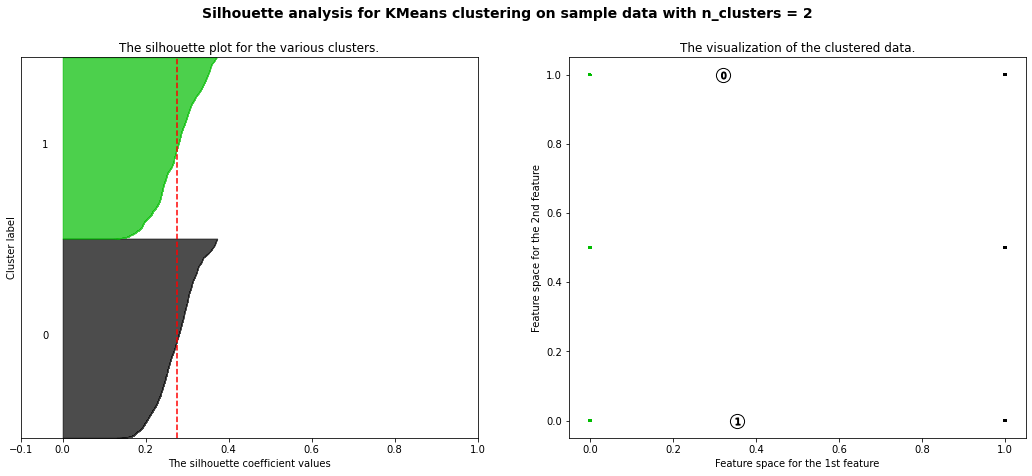

In [ ]:
range_n_clusters = [2]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df3) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df3)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df3, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df3["gender"], df3["home_env"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
range_n_clusters = [3]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df3) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df3)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df3, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df3["gender"], df3["home_env"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# For n_clusters = 3 The average silhouette_score is : 0.290177973522508


For n_clusters = 3 The average silhouette_score is : 0.290177973522508


In [ ]:
range_n_clusters = [4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df3) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df3)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df3, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df3["gender"], df3["home_env"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# For n_clusters = 4 The average silhouette_score is : 0.3480058327912568


For n_clusters = 4 The average silhouette_score is : 0.3480058327912568


For n_clusters = 5 The average silhouette_score is : 0.3008798408294185


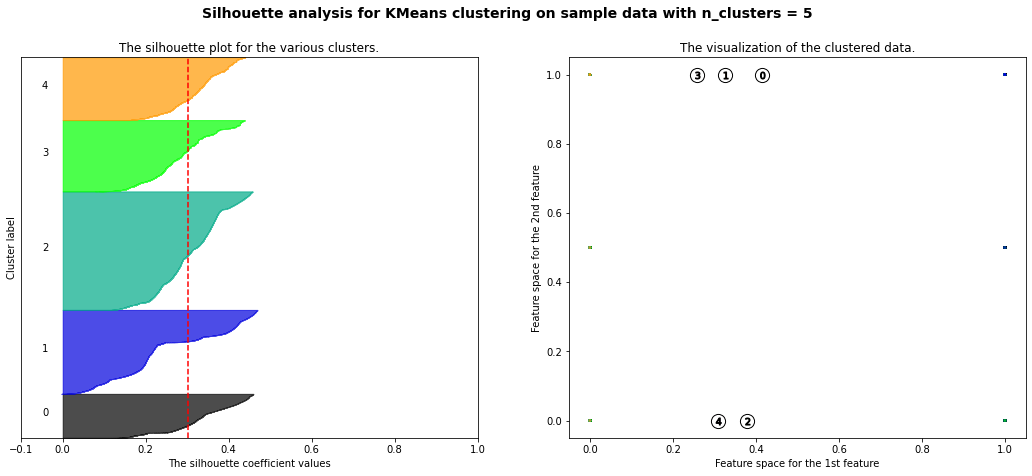

In [ ]:
range_n_clusters = [5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df3) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df3)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df3, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df3["gender"], df3["home_env"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# For n_clusters = 5 The average silhouette_score is : 0.3008798408294185


In [ ]:
range_n_clusters = [6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df3) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df3)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df3, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df3["gender"], df3["home_env"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Step3. Plot each cluster

In [ ]:
df2 = df3.copy()

In [ ]:
km = KMeans(n_clusters= 4, n_init = 2, init = "random", random_state = 42)
km.fit(df2)
y_kmeans = km.predict(df2)
y_kmeans

array([2, 3, 3, ..., 1, 0, 0], dtype=int32)

In [ ]:
y_kmeans[1]

In [ ]:
df2['cluster'] = y_kmeans
df2.head()

,age,gender,hand,sleep,edu_level,commute_level,home_env,cluster
0,0.961538,0.0,0.0,0.636364,0.0,0.0,1.0,2
1,0.000000,1.0,1.0,0.545455,1.0,0.0,0.5,3
2,0.000000,1.0,1.0,0.545455,1.0,1.0,1.0,3
3,0.057692,0.0,0.0,0.545455,0.0,0.5,0.5,2
4,0.346154,1.0,0.0,0.363636,0.0,0.5,0.0,0


In [ ]:
df['cluster'] = y_kmeans
df.head()

,age,gender,hand,navigating_skills,sleep,edu_level,commute_level,home_env,cluster
0,68.0,0,0,1,8.0,0,0,2,2
1,18.0,1,1,2,7.0,1,0,1,3
2,18.0,1,1,3,7.0,1,2,2,3
3,21.0,0,0,2,7.0,0,1,1,2
4,36.0,1,0,3,5.0,0,1,0,0


In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns


In [ ]:
df2_1 = df[df['cluster']  == 0]


#df2_1 = df2_1.drop(["cluster", "navigating_skills"], axis=1)
df2_1.head()

,age,gender,hand,navigating_skills,sleep,edu_level,commute_level,home_env,cluster
4,36.0,1,0,3,5.0,0,1,0,0
6,61.0,1,0,2,7.0,0,0,1,0
7,29.0,1,0,3,7.0,0,2,0,0
9,38.0,1,0,2,7.0,0,0,0,0
10,39.0,1,0,3,6.0,0,0,2,0


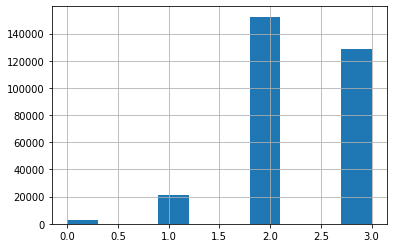

In [ ]:
df2_1['navigating_skills'].hist()

In [ ]:
sum(df2_1['navigating_skills'] == 0)

3103

In [ ]:
sum(df2_1['navigating_skills'] == 1)

21400

In [ ]:
sum(df2_1['navigating_skills'] == 2)

152372

In [ ]:
sum(df2_1['navigating_skills'] == 3)

128800

In [ ]:
df2_2 = df[df['cluster']  == 3]

#df2_2 = df2_2.drop(["cluster", "navigating_skills"], axis=1)
df2_2.head()

,age,gender,hand,navigating_skills,sleep,edu_level,commute_level,home_env,cluster
1,18.0,1,1,2,7.0,1,0,1,3
2,18.0,1,1,3,7.0,1,2,2,3
5,19.0,1,0,2,8.0,1,0,1,3
11,44.0,1,0,2,7.0,1,1,1,3
12,47.0,1,1,2,7.0,1,1,1,3


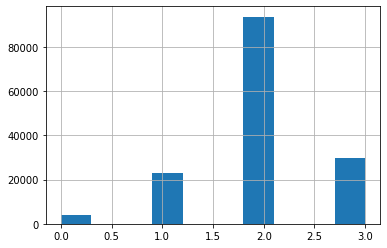

In [ ]:
df2_2['navigating_skills'].hist()

In [ ]:
df2_3 = df[df['cluster']  == 2]

#df2_3 = df2_3.drop(["cluster", "navigating_skills"], axis=1)
df2_3.head()

,age,gender,hand,navigating_skills,sleep,edu_level,commute_level,home_env,cluster
0,68.0,0,0,1,8.0,0,0,2,2
3,21.0,0,0,2,7.0,0,1,1,2
8,19.0,0,0,1,8.0,0,0,1,2
22,24.0,0,0,2,8.0,0,2,2,2
23,50.0,0,0,1,6.0,0,1,0,2


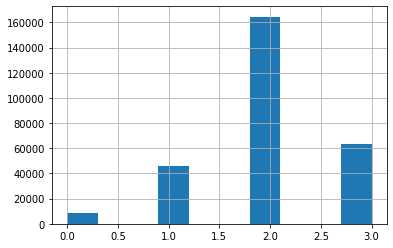

In [ ]:
df2_3['navigating_skills'].hist()

In [ ]:
df2_4 = df[df['cluster']  == 1]

#df2_4 = df2_4.drop(["cluster", "navigating_skills"], axis=1)
df2_4.head()

,age,gender,hand,navigating_skills,sleep,edu_level,commute_level,home_env,cluster
13,18.0,0,0,2,8.0,1,1,1,1
21,23.0,0,0,3,8.0,1,1,2,1
31,20.0,0,0,1,10.0,1,0,1,1
40,62.0,0,0,3,8.0,1,0,1,1
41,54.0,0,0,0,7.0,1,0,1,1


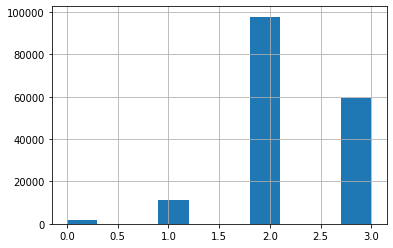

In [ ]:
df2_4['navigating_skills'].hist()

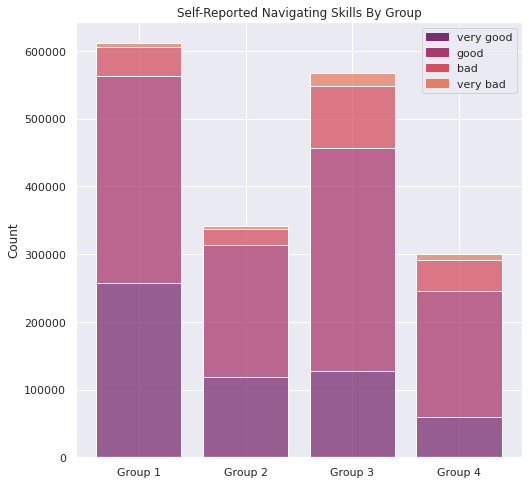

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 8))


df['cluster'] = pd.Categorical(df['cluster'], ['0', '3', '2', '1'])

plt.rcParams['font.size'] = '30'

ax = sns.histplot(
    df,
    x='cluster',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    weights=2,
    hue='navigating_skills',
    multiple='stack',
    palette= sns.color_palette("flare", n_colors=4), #['#24b1d1', '#ae24d1'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
)


#ax.set_xticks
ax.set_xticklabels(['Group 1', 'Group 2','Group 3', 'Group 4'])
ax.set_title('Self-Reported Navigating Skills By Group')
# Remove 'Count' ylabel.
ax.set_xlabel(None)
# add legend
top_bar = mpatches.Patch(color= sns.color_palette("flare", n_colors=4)[3], label='very good')
second_bar = mpatches.Patch(color= sns.color_palette("flare", n_colors=4)[2], label='good')
third_bar = mpatches.Patch(color= sns.color_palette("flare", n_colors=4)[1], label='bad')
bottom_bar = mpatches.Patch(color=sns.color_palette("flare", n_colors=4)[0], label='very bad')
plt.legend(handles=[top_bar, second_bar, third_bar, bottom_bar])



In [ ]:
df

,age,gender,hand,navigating_skills,sleep,edu_level,commute_level,home_env,cluster
0,68.0,0,0,1,8.0,0,0,2,2
1,18.0,1,1,2,7.0,1,0,1,3
2,18.0,1,1,3,7.0,1,2,2,3
3,21.0,0,0,2,7.0,0,1,1,2
4,36.0,1,0,3,5.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
909451,50.0,1,1,2,6.0,1,2,0,3
909452,68.0,1,0,2,8.0,0,1,2,0
909453,59.0,0,0,3,7.0,1,0,2,1
909454,48.0,1,0,2,6.0,0,2,1,0


In [ ]:
df_model = df.copy()

skill_map = {0:"very bad", 1:"bad", 2:"good", 3:"very good"}
df_model['navigating_skills'] = df_model['navigating_skills'].replace(skill_map)


No handles with labels found to put in legend.


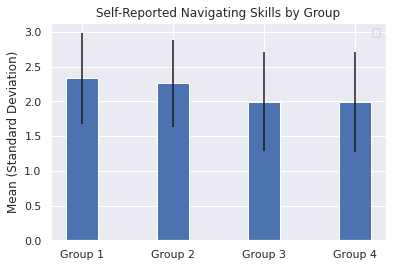

In [ ]:
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
means = [df2_1['navigating_skills'].mean(), df2_2['navigating_skills'].mean(), df2_3['navigating_skills'].mean(), df2_4['navigating_skills'].mean()]
stds = [df2_1['navigating_skills'].std(), df2_2['navigating_skills'].std(), df2_3['navigating_skills'].std(), df2_3['navigating_skills'].std()]

#men_std = [2, 3, 4, 1]
#women_std = [3, 5, 2, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()


ax.bar(labels, means, width,  yerr=stds,
      )

ax.set_ylabel('Mean (Standard Deviation)')
ax.set_title('Self-Reported Navigating Skills by Group')
ax.legend()

plt.show()

In [ ]:
df2_1['navigating_skills'].std()

0.6499103177849569

In [ ]:
# df2_1['gender'] = df2_1['gender'].astype('category')

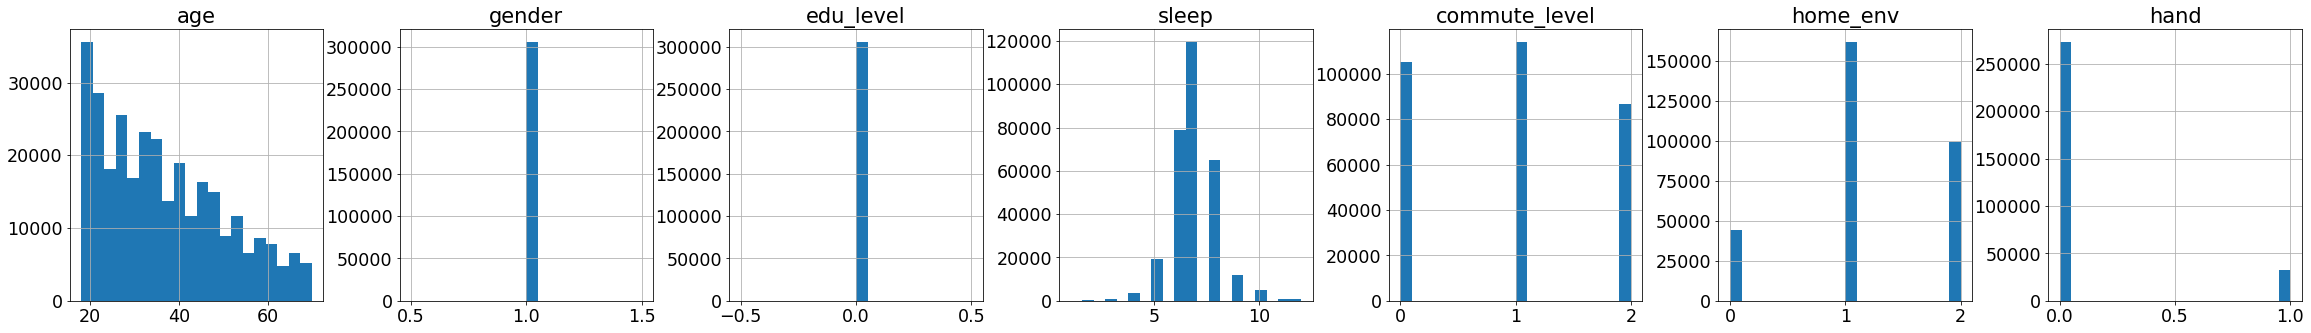

In [ ]:
plt.rcParams['font.size'] = '17.5'


hist = df2_1.hist(column = ["age", "gender",  "edu_level", "sleep", "commute_level", "home_env", "hand"], bins=20, layout = (1, 7), figsize=(40,5))
#plt.xticks(fontsize=13)

#df.hist(column=["Test_1", "Test_2"]) 

In [ ]:
# 3 k male with medium or high commute level
# 4k male, all age range, both edu, medium to high commute levels, all env

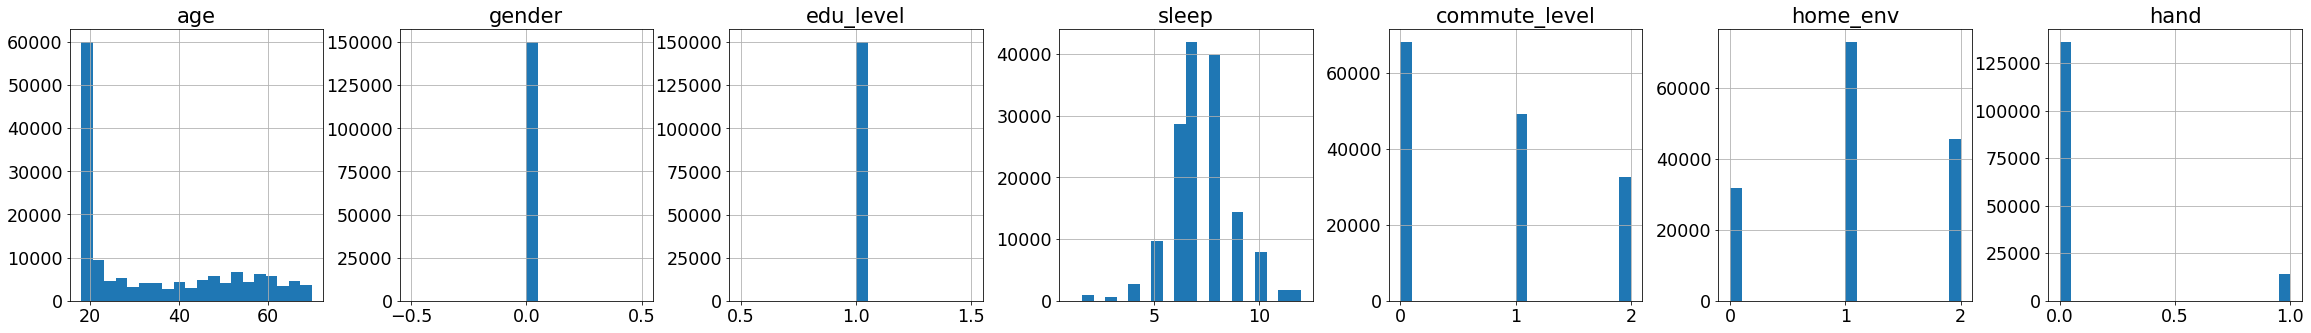

In [ ]:
hist = df2_2.hist(column = ["age", "gender", "edu_level", "sleep",  "commute_level", "home_env", "hand"], bins=20, layout = (1, 7), figsize=(40,5))


In [ ]:
# 3k female
# 4k all age range, female, both education and all commute levels

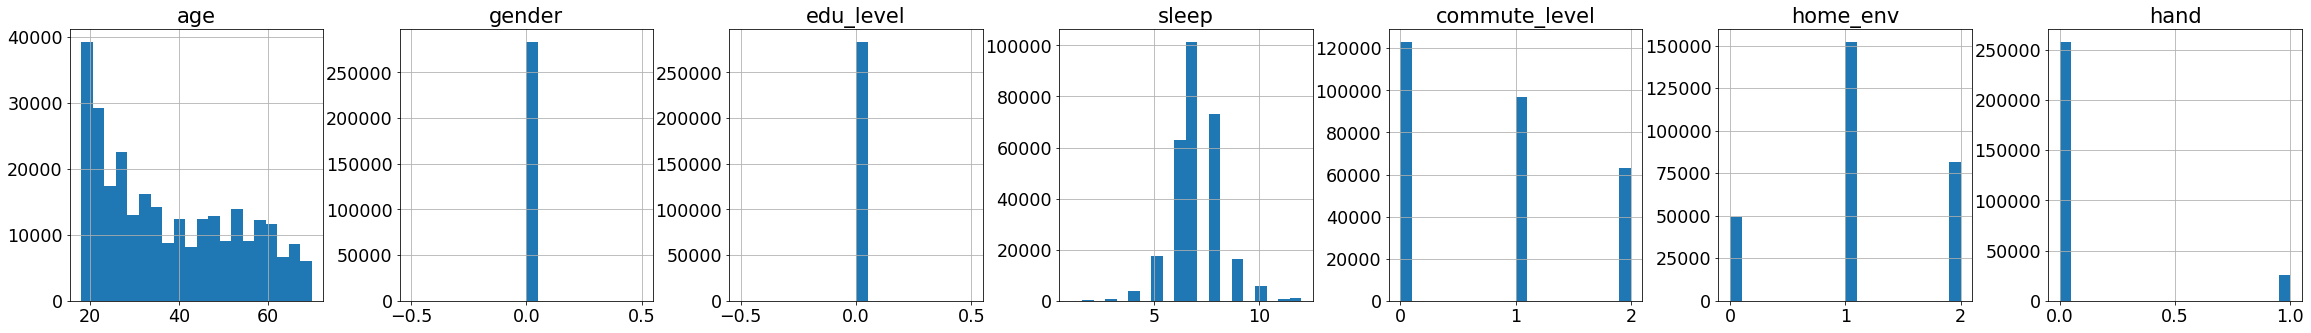

In [ ]:
hist = df2_3.hist(column = ["age", "gender", "edu_level", "sleep",  "commute_level", "home_env", "hand"], bins=20, layout = (1, 7), figsize=(40,5))


In [ ]:
# 3k male with low or medium commute level

# 4k wide age range, male, low to medium commute, secondary education

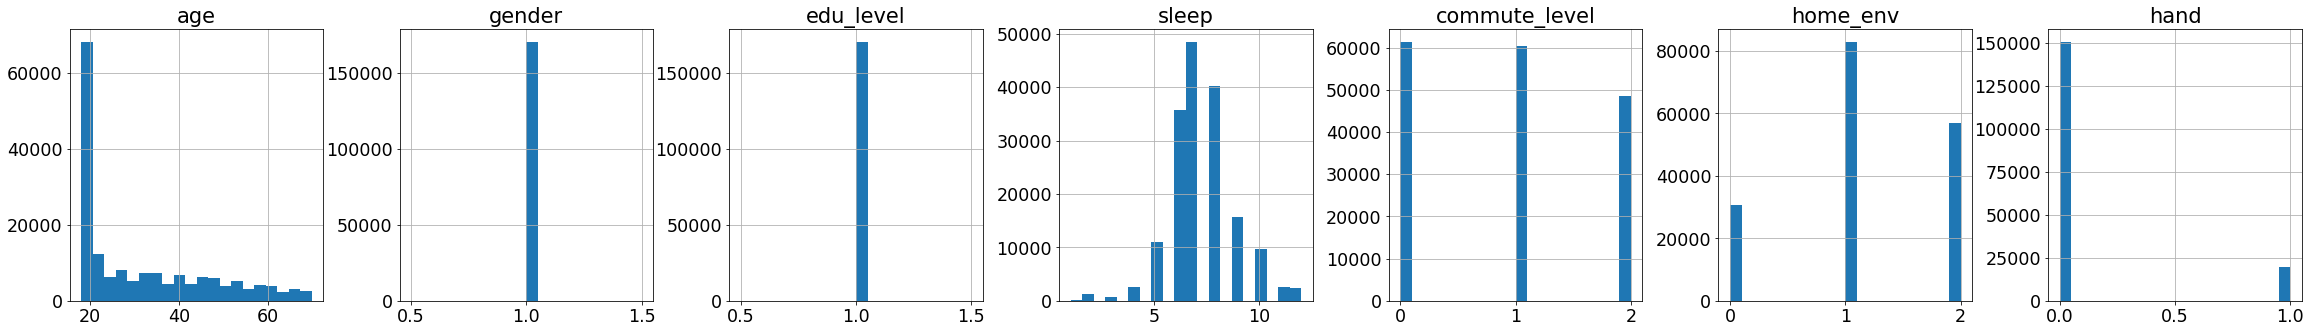

In [ ]:
hist = df2_4.hist(column = ["age", "gender", "edu_level", "sleep",  "commute_level", "home_env", "hand"], bins=20, layout = (1, 7), figsize=(40,5))


In [ ]:
# 4k male, early twenties, low to medium commute, tertiary school